## Aim

Compare the coverage of the Signor network with the markers measured and the overexpressions performed

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, HTML
%matplotlib inline

In [2]:
# The complete signor network
signor_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/20160110_signor_all_data.tsv'

In [3]:
# The antibody names in uniprot
antibody_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/201602_antibody_uniprot.csv'


In [4]:
# The overexpressions in uniprot
overexp_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/201602_gene_uniprot.csv'

In [5]:
# Effect mechanism filters for signor
not_used_effects = ['']

Read the network

In [6]:
signor_tab = pd.read_csv(signor_fn, sep='\t')
print(signor_tab.columns)
signor_tab



Index([u'EntityA', u'TypeA', u'IdA', u'DatabaseA', u'EntityB', u'TypeB',
       u'IdB', u'DatabaseB', u'Effect', u'EffectMechanism',
       u'MechanismResidues', u'MechanismSequences', u'BiosourceTaxid',
       u'BiosourceCellType', u'BiosourceTissue', u'ModulatorComplex',
       u'TargetComplex', u'PreModificationA', u'PreModificationASequences',
       u'PreModificationB', u'PreModificationBSeqeunces', u'Pmid', u'Direct',
       u'GeneralNotes', u'Annotator', u'Sentence', u'Relation_ac'],
      dtype='object')


,EntityA,TypeA,IdA,DatabaseA,EntityB,TypeB,IdB,DatabaseB,Effect,EffectMechanism,...,PreModificationA,PreModificationASequences,PreModificationB,PreModificationBSeqeunces,Pmid,Direct,GeneralNotes,Annotator,Sentence,Relation_ac
0,CSNK2A1,PROTEIN,P68400,UNIPROT,SLK,PROTEIN,Q9H2G2,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16837460,YES,NaN,gcesareni,Slk down-regulation by v-src is indirect and i...,SIGNOR-147879
1,CSNK2A1,PROTEIN,P68400,UNIPROT,SLK,PROTEIN,Q9H2G2,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16837460,YES,NaN,gcesareni,Slk down-regulation by v-src is indirect and i...,SIGNOR-147883
2,DUSP4,PROTEIN,Q13115,UNIPROT,MAPK14,PROTEIN,Q16539,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16849326,YES,NaN,gcesareni,This result suggests that dusp4 represses gluc...,SIGNOR-147958
3,PTPRA,PROTEIN,P18433,UNIPROT,KCNB1,PROTEIN,Q14721,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16870705,YES,NaN,gcesareni,Ptpalpha inhibits kv channels more strongly th...,SIGNOR-148301
4,CTDSP1,PROTEIN,Q9GZU7,UNIPROT,SMAD1,PROTEIN,Q15797,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16882717,YES,NaN,lpetrilli,"In human cells, rnai-mediated depletion of scp...",SIGNOR-148396
5,CTDSP2,PROTEIN,O14595,UNIPROT,SMAD1,PROTEIN,Q15797,UNIPROT,down-regulates,dephosphorylation,...,NaN,NaN,NaN,NaN,16882717,YES,NaN,lpetrilli,"In human cells, rnai-mediated depletion of scp...",SIGNOR-148434
6,FBXW11,PROTEIN,Q9UKB1,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,ubiquitination,...,NaN,NaN,NaN,NaN,16885021,YES,NaN,gcesareni,Claspin degradation was triggered by its inter...,SIGNOR-148438
7,PLK1,PROTEIN,P53350,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16885021,YES,NaN,gcesareni,"We show that claspin, an adaptor protein requi...",SIGNOR-148442
8,PLK1,PROTEIN,P53350,UNIPROT,CLSPN,PROTEIN,Q9HAW4,UNIPROT,down-regulates,phosphorylation,...,NaN,NaN,NaN,NaN,16885022,YES,NaN,gcesareni,"We show that claspin, an adaptor protein requi...",SIGNOR-148447
9,CP,PROTEIN,P00450,UNIPROT,SMO,PROTEIN,Q99835,UNIPROT,down-regulates,binding,...,NaN,NaN,NaN,NaN,16885213,YES,NaN,gcesareni,Genetic and biochemical studies imply that smo...,SIGNOR-148451


In [7]:
# Unique  interaction types
signor_tab[u'EffectMechanism'].unique()



array(['phosphorylation', 'dephosphorylation', 'ubiquitination', 'binding',
       'chemical inhibition', 'acetylation', 'sumoylation', nan,
       'hydroxylation', 'relocalization', 'deacetylation', 'cleavage',
       'destabilization', 'methylation', 'transcriptional regulation',
       'chemical activation', 'small molecule catalysis',
       'deubiquitination', 'guanine nucleotide exchange factor',
       'glycosylation', 's-nitrosylation', 'demethylation',
       'post transcriptional regulation', 'gtpase-activating protein',
       'Deacetylation', 'stabilization', 'Phosphorylation', 'neddylation',
       'transcriptional repression', 'palmitoylation', 'trimethylation',
       'desumoylation', 'tyrosination'], dtype=object)

In [8]:
g= nx.from_pandas_dataframe(signor_tab,'IdA','IdB',edge_attr=[u'Effect', u'EffectMechanism',
       u'MechanismResidues', u'MechanismSequences',u'Direct'], create_using=nx.DiGraph())

Make a dict for the names

In [9]:
signor_dict = {k: v for k,v in zip(signor_tab['IdA'],signor_tab['EntityA'])}
signor_dict.update({k: v for k,v in zip(signor_tab['IdB'],signor_tab['EntityB'])})


    Read the antibody and gene information

In [10]:
overexp_tab = pd.read_csv(overexp_fn)
overexp_tab.head(2)

overexp_dict = {k: v for k,v in zip(overexp_tab['gene_xkl'],overexp_tab['UniProt'])}

In [11]:
antibody_tab = pd.read_csv(antibody_fn)
antibody_tab.head(2)

antibody_dict= dict()
for ab, tab in antibody_tab.groupby('Antibody'):
    if not(tab['UniProt'].isnull().values.any()):
        antibody_dict[ab] = set(tab['UniProt'])

## Make a minimum spanning tree network containing all the nodes measured by antibodies or overexpressions

In [12]:
xkl_nodes = np.unique(overexp_tab['UniProt'].dropna().tolist() + antibody_tab['UniProt'].dropna().tolist())



In [13]:
all_nodes = g.nodes()
signor_xkl_nodes = [n for n in all_nodes if n in xkl_nodes]
len(signor_xkl_nodes) == len(xkl_nodes)

True

-> All XKL nodes are actually in Signor! Cool!

Prune the graph to contain only nodes contained in all shortest paths between all the xkl_nodes

In [14]:
def shortest_path_nodes(graph, source, target, max_cutoff = 10, all_cutoff=5):
    """
    Returns all nodes between the shortest path between source and target
    max_cutoff: Return empty set if the shortest path exceeds this cutoff.
    all_cutoff: Consider all possible shortest paths, for paths shorter than this cuttoff.
    """
    
    assert(max_cutoff >= all_cutoff)
    
    try:
        sp = nx.shortest_path(g, source, target)
    except nx.NetworkXNoPath:
        sp =set()
    sp_len = len(sp)
    if 0 < sp_len <= all_cutoff:
        sp = nx.all_shortest_paths(g, source, target)
        sp = set(n for nl in sp for n in nl)
    if sp_len <= max_cutoff:
        return(set(sp))
    
    else:
        return(set())

In [15]:
#nx.single_source_shortest_path(g,signor_xkl_nodes[0])
#list(nx.all_simple_paths(g,signor_xkl_nodes[0],signor_xkl_nodes[1],5))


n=len(signor_xkl_nodes)
all_xkl_spnodes = set()
for i in range(n):
    for j in range(n):
        nodes = shortest_path_nodes(g, signor_xkl_nodes[i], signor_xkl_nodes[j],
                                           max_cutoff = 10, all_cutoff=5)
        all_xkl_spnodes.update(nodes)

g_xkl = g.copy()
for n in g_xkl.nodes():
    if n not in all_xkl_spnodes:
        g_xkl.remove_node(n)
        
print(len(all_xkl_spnodes))
#print(all_xkl_spnodes)

346


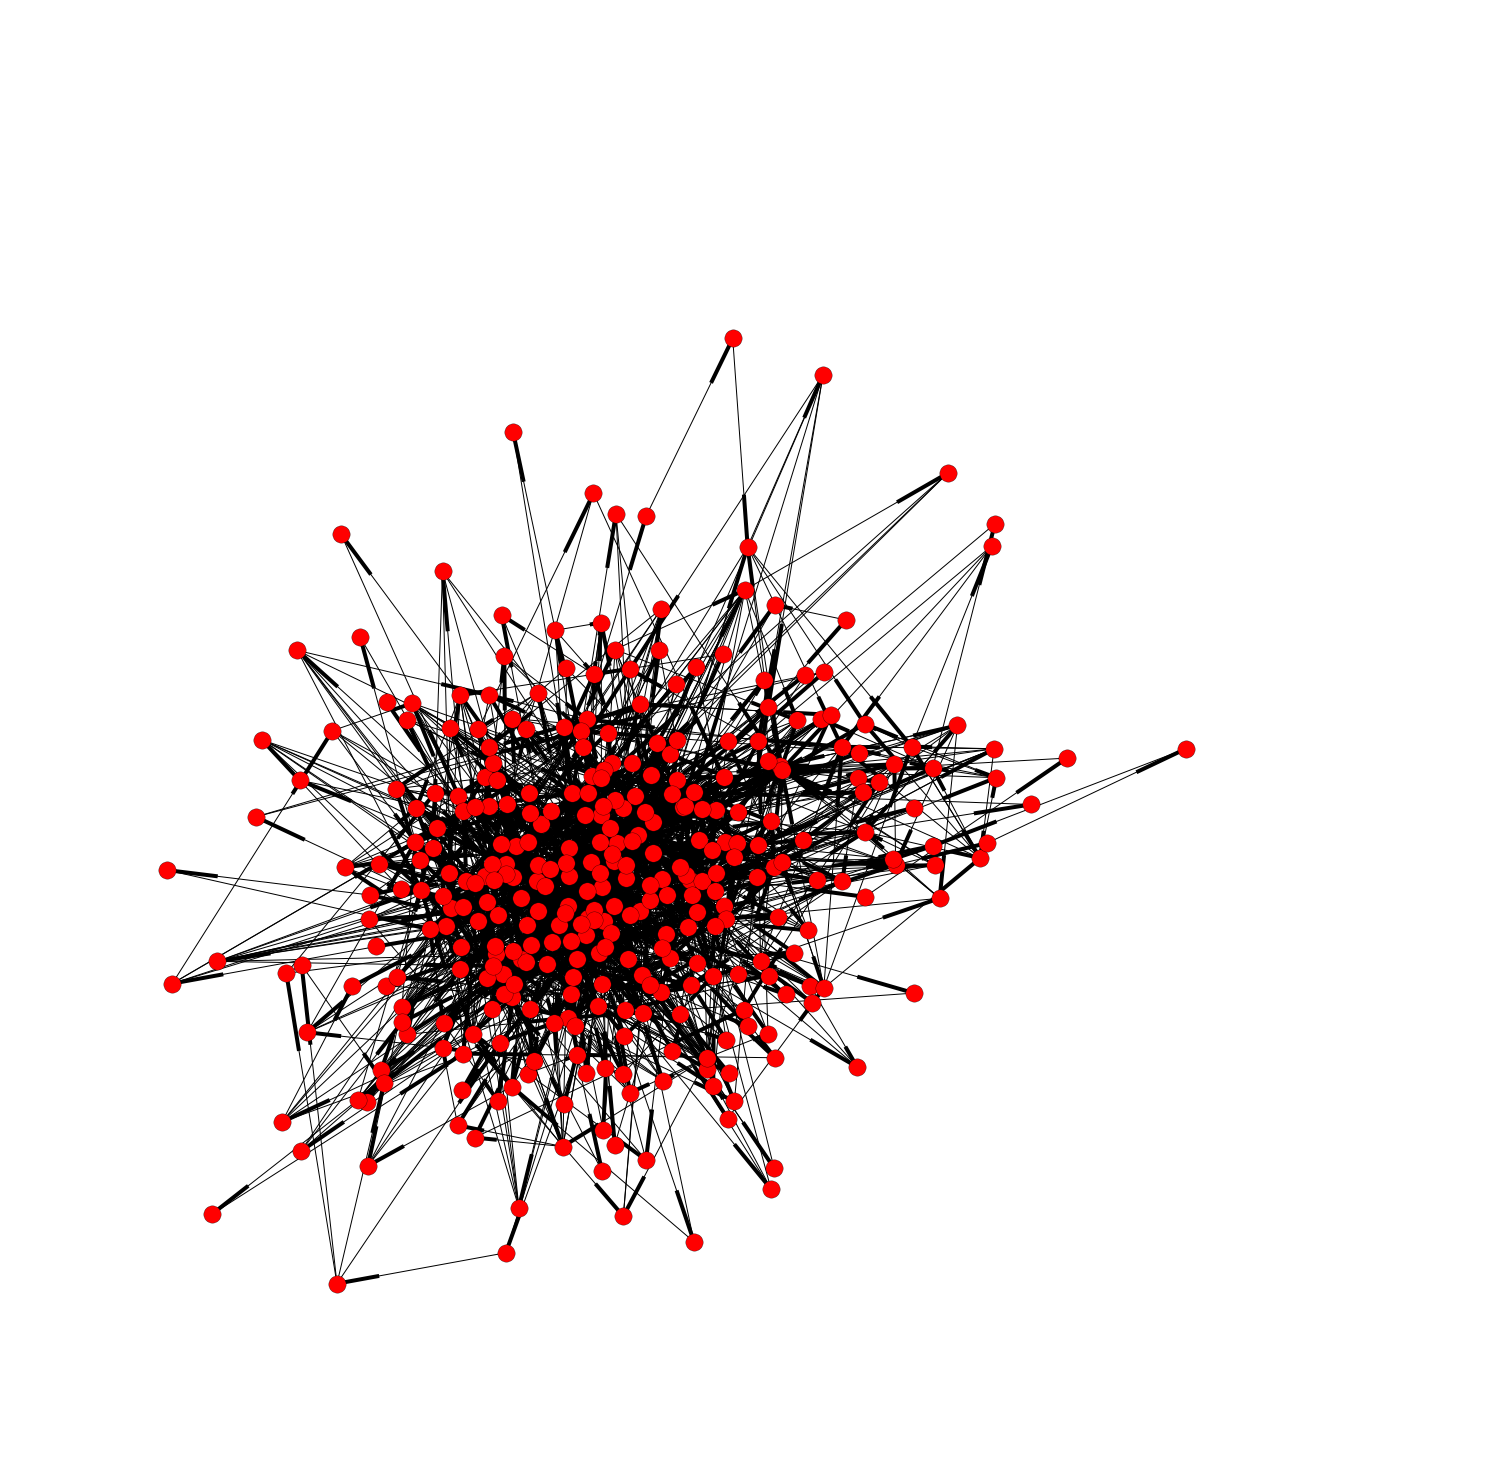

In [16]:
plt.figure(figsize=(20,20))
nx.draw_spring(g_xkl)


The graph is really to big for visualization

Sanity check: check for hubs -> might be artificial shortcuts

In [17]:
centr = pd.DataFrame.from_dict([nx.degree_centrality(g_xkl)])
centr = centr.swapaxes(0,1)

centr = centr.reset_index(drop=False)
centr.columns = ['id', 'centrality']


centr['name'] = [signor_dict[id] for id in centr['id']]
centr.sort_values('centrality', ascending=False, inplace=True)

In [18]:
centr.head(10)

,id,centrality,name
130,P31749,0.214493,AKT1
119,P28482,0.202899,MAPK1
117,P27361,0.197101,MAPK3
267,Q16539,0.159420,MAPK14
174,P49841,0.139130,GSK3B
51,P04637,0.133333,TP53
81,P12931,0.130435,SRC
60,P06493,0.121739,CDK1
40,P00533,0.121739,EGFR
131,P31751,0.118841,AKT2


How does this look for direct interactions only?

In [19]:
g_dir = g.copy()

In [20]:
for e in g_dir.edges():
    e_dat = g_dir.get_edge_data( e[0], e[1])
    if e_dat['Direct'] != 'YES':
        g_dir.remove_edge( e[0], e[1])



In [21]:
print(len(g_dir.edges()))

print(len(g.edges()))

7479
8607


In [22]:
n=len(signor_xkl_nodes)
all_dir_xkl_spnodes = set()
for i in range(n):
    for j in range(n):
        nodes = shortest_path_nodes(g_dir, signor_xkl_nodes[i], signor_xkl_nodes[j],
                                           max_cutoff = 10, all_cutoff=5)
        all_dir_xkl_spnodes.update(nodes)

g_dir_xkl = g_dir.copy()
for n in g_dir_xkl.nodes():
    if n not in all_dir_xkl_spnodes:
        g_dir_xkl.remove_node(n)
        
print(len(all_dir_xkl_spnodes))


346


-> In terms of total nodes considering only direct edges does not change anything...

## Check the average shortest path length between overexpressions and phosphoproteins

Calculate pairwise shortest path distance, taking the minimum distanc if the antibody is not specific

In [23]:
col = antibody_dict.keys()
row = overexp_tab['gene_xkl']

pair_sp = np.empty((len(row), len(col)))
pair_sp[:] = np.NAN
for i, over in enumerate(row):
    for j, ab in enumerate(col):
        sp = list()
        for ab_prot in antibody_dict[ab]:
            ov_prot = overexp_dict[over]
            try:
                sp.append(nx.shortest_path_length(g, ov_prot, ab_prot))
            except nx.NetworkXNoPath:
                pass
        if len(sp) > 0:
            pair_sp[i,j] = np.min(sp)
        else:
            pair_sp[i,j] = 10
 



In [24]:
pair_dat = pd.DataFrame(pair_sp,columns=col, index=row)
pair_dat = pair_dat.stack()
pair_dat.index = pair_dat.index.rename(['marker','target'])

Look at the distribution

count    620.000000
mean       3.187097
std        1.985528
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
dtype: float64

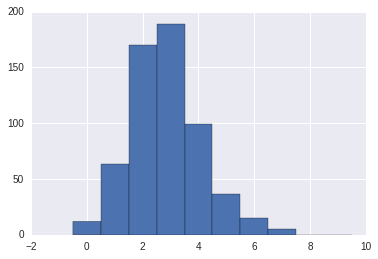

In [25]:
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
pair_dat.hist(bins=bins)
pair_dat.describe()


Look at the minium number of measured nodes at the shortest path

In [26]:
def get_min_measured_nodes_shortest_path(g, source, target, measured_nodes):
    """
    """

    
    try:
        sp = nx.shortest_path(g, source, target)
    except nx.NetworkXNoPath:
        return 10

    sp = nx.all_shortest_paths(g, source, target)
        
    n_measured_between = max(sum(1 for n in nl if n in measured_nodes) for nl in sp)
    
    return n_measured_between

col = antibody_dict.keys()
row = overexp_tab['gene_xkl']

pair_sp_nbetween = np.empty((len(row), len(col)))
pair_sp_nbetween[:] = np.NAN
for i, over in enumerate(row):
    for j, ab in enumerate(col):
        sp = list()
        for ab_prot in antibody_dict[ab]:
            ov_prot = overexp_dict[over]
            try:
                sp.append(get_min_measured_nodes_shortest_path(g, ov_prot, ab_prot, set(xkl_nodes)))
            except nx.NetworkXNoPath:
                pass
        if len(sp) > 0:
            pair_sp_nbetween[i,j] = np.min(sp)-1
        else:
            pair_sp_nbetween[i,j] = 10

pair_dat_nbetween = pd.DataFrame(pair_sp_nbetween,columns=col, index=row)
pair_dat_nbetween = pair_dat_nbetween.stack()
pair_dat_nbetween.index = pair_dat_nbetween.index.rename(['marker','target'])

count    620.000000
mean       2.446774
std        1.752563
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
dtype: float64

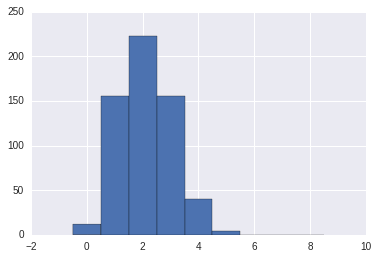

In [27]:
bins = np.arange(int(np.ceil(pair_dat_nbetween.max()))+1)-0.5
pair_dat_nbetween.hist(bins=bins)
pair_dat_nbetween.describe()

In [28]:
(sum(1 for n in range(10) if n >10))


0

In [53]:
# From comparison analysis
# BPR2 only

x = [(s.split('_')[0],s.split('_')[1]) for s in {'AKT1_Beta-catenin_0',
 'AKT1_p-4EBP1_0',
 'AKT1_p-GSK3-Beta_0',
 'AKT1_p-SMAD1-5_0',
 'AKT1_p-SMAD2-3_0',
 'BRAF_p-MKK3-6_0',
 'GSK3B_Beta-catenin_0',
 'GSK3B_p-FAK_0',
 'GSK3B_p-MEK1-2_0',
 'GSK3B_p-PDPK1_0',
 'GSK3B_p-STAT5_0',
 'HRAS_p-SMAD1-5_0',
 'MAP2K1_p-4EBP1_0',
 'MAP2K1_p-BTK_0',
 'MAP2K1_p-GSK3-Beta_0',
 'MAP2K6_p-GSK3-Beta_0',
 'PDPK1_p-MAPKAPK2_0',
 'PDPK1_p-S6_0',
 'PIK3CA_p-SMAD1-5_0',
 'PIK3CA_p-p38_0',
 'PTPN11_p-JNK_0',
 'SRC_p-JNK_0'}


]


print(pair_dat.loc[x])
print(np.nanmean(pair_dat.loc[x]))

marker  target      
AKT1    Beta-catenin    1
PIK3CA  p-p38           2
MAP2K1  p-GSK3-Beta     1
PDPK1   p-S6            2
GSK3B   p-FAK           3
MAP2K1  p-BTK           6
HRAS    p-SMAD1-5       4
GSK3B   Beta-catenin    1
PTPN11  p-JNK           3
PIK3CA  p-SMAD1-5       3
MAP2K1  p-4EBP1         2
AKT1    p-4EBP1         2
        p-GSK3-Beta     1
BRAF    p-MKK3-6        4
SRC     p-JNK           2
GSK3B   p-MEK1-2        3
AKT1    p-SMAD2-3       1
MAP2K6  p-GSK3-Beta     2
GSK3B   p-PDPK1         3
        p-STAT5         2
AKT1    p-SMAD1-5       2
PDPK1   p-MAPKAPK2      3
dtype: float64
2.40909090909


marker   target      
AKT1     Beta-catenin     1
PIK3CA   p-MKK3-6         3
         p-p38            2
GSK3B    p-SHP2           4
MAP2K1   p-GSK3-Beta      1
MAP3K5   p-MKK3           1
PDPK1    p-S6             2
HRAS     p-JNK            3
AKT1     p-MKK3-6         2
MAP3K5   p-GSK3-Beta      2
GSK3B    p-FAK            3
MAP2K1   p-BTK            6
MAP3K5   p-PDPK1          5
PDPK1    p-BTK            5
AKT1     p-GSK3-Beta      1
GSK3B    Beta-catenin     1
PTPN11   p-JNK            3
CRAF     p-p90RSK         3
PDPK1    p-MAPKAPK2       3
MAP3K5   p-SMAD2-3        2
HRAS     p-SMAD2-3        3
MAP2K7   p-SMAD1-5        4
AKT1     p-4EBP1          2
MAPK1    p-ERK1-2         0
HRAS     p-SMAD1-5        4
BRAF     p-MKK3-6         4
SRC      p-JNK            2
GSK3B    p-MEK1-2         3
MAP2K6   p-STAT1          2
AKT1     p-SMAD2-3        1
MAP2K6   p-GSK3-Beta      2
GSK3B    p-PDPK1          3
         p-STAT5          2
AKT1     p-p70S6K         2
         p-SMAD1-5        

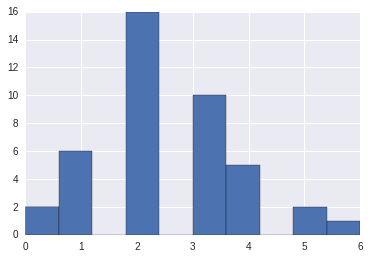

In [54]:
# bpR2 but not Dremi
x = [(s.split('_')[0],s.split('_')[1]) for s in {'AKT1_Beta-catenin_0',
 'AKT1_p-4EBP1_0',
 'AKT1_p-AKT_0',
 'AKT1_p-GSK3-Beta_0',
 'AKT1_p-MKK3-6_0',
 'AKT1_p-SMAD1-5_0',
 'AKT1_p-SMAD2-3_0',
 'AKT1_p-p70S6K_0',
 'BRAF_p-MKK3-6_0',
 'CRAF_p-p90RSK_0',
 'GSK3B_Beta-catenin_0',
 'GSK3B_p-FAK_0',
 'GSK3B_p-MEK1-2_0',
 'GSK3B_p-PDPK1_0',
 'GSK3B_p-SHP2_0',
 'GSK3B_p-STAT5_0',
 'GSK3B_p-p70S6K_0',
 'HRAS_p-JNK_0',
 'HRAS_p-SMAD1-5_0',
 'HRAS_p-SMAD2-3_0',
 'MAP2K1_p-4EBP1_0',
 'MAP2K1_p-BTK_0',
 'MAP2K1_p-GSK3-Beta_0',
 'MAP2K6_p-GSK3-Beta_0',
 'MAP2K6_p-STAT1_0',
 'MAP2K7_p-SMAD1-5_0',
 'MAP3K5_p-GSK3-Beta_0',
 'MAP3K5_p-HH3_0',
 'MAP3K5_p-MKK3_0',
 'MAP3K5_p-PDPK1_0',
 'MAP3K5_p-SMAD2-3_0',
 'MAP3K5_p-STAT1_0',
 'MAPK1_p-ERK1-2_0',
 'PDPK1_p-BTK_0',
 'PDPK1_p-MAPKAPK2_0',
 'PDPK1_p-S6_0',
 'PIK3CA_p-JNK_0',
 'PIK3CA_p-MKK3-6_0',
 'PIK3CA_p-SMAD1-5_0',
 'PIK3CA_p-p38_0',
 'PTPN11_p-JNK_0',
 'RPS6KA1_p-PDPK1_0',
 'SRC_p-JNK_0'}
]


print(pair_dat.loc[x])
print(np.nanmean(pair_dat.loc[x]))
pair_dat.loc[x].hist()

marker      target      
MAP2K6      cyclin B1      NaN
GFP-FLAG-2  cyclin B1      NaN
MAP3K5      Beta-catenin     3
HRAS        p-RB           NaN
SRC         Beta-catenin     1
PTPN11      p-MARCKS         4
MAP2K1      cyclin B1      NaN
MAP8        p-PLCg2          6
MAP2K6      p-RB           NaN
RPS6KB1     p-RB           NaN
MAPK14      p-RB           NaN
RPS6KB1     cyclin B1      NaN
MAP2K1      p-RB           NaN
GFP-FLAG-1  p-RB           NaN
MAP2K1      p-S6             3
PTPN11      p-RB           NaN
RPS6KA1     p-RB           NaN
MAP8        cyclin B1      NaN
GFP-FLAG-1  cyclin B1      NaN
MAP3K5      p-RB           NaN
AKT1        p-S6             3
BRAF        p-S6             4
PDPK1       p-AKT            1
AKT1        p-RB           NaN
GFP-FLAG-2  p-RB           NaN
MAPK14      cyclin B1      NaN
dtype: float64
3.125


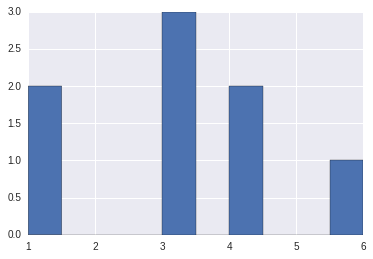

In [55]:
# dremi only
x = [(s.split('_')[0],s.split('_')[1]) for s in {'AKT1_p-RB_0',
 'AKT1_p-S6_0',
 'BRAF_p-S6_0',
 'GFP-FLAG-1_cyclin B1_0',
 'GFP-FLAG-1_p-RB_0',
 'GFP-FLAG-2_cyclin B1_0',
 'GFP-FLAG-2_p-RB_0',
 'HRAS_p-RB_0',
 'MAP2K1_cyclin B1_0',
 'MAP2K1_p-RB_0',
 'MAP2K1_p-S6_0',
 'MAP2K6_cyclin B1_0',
 'MAP2K6_p-RB_0',
 'MAP3K5_Beta-catenin_0',
 'MAP3K5_p-RB_0',
 'MAP8_cyclin B1_0',
 'MAP8_p-PLCg2_0',
 'MAPK14_cyclin B1_0',
 'MAPK14_p-RB_0',
 'PDPK1_p-AKT_0',
 'PTPN11_p-MARCKS_0',
 'PTPN11_p-RB_0',
 'RPS6KA1_p-RB_0',
 'RPS6KB1_cyclin B1_0',
 'RPS6KB1_p-RB_0',
 'SRC_Beta-catenin_0'}
]


print(pair_dat.loc[x])
print(np.nanmean(pair_dat.loc[x]))
pair_dat.loc[x].hist()

## Check consistency with bp-R2 analysis

In [32]:
bp_file = '/mnt/imls-bod/Xiao-Kang/EGF transfection/plots/nbin10_2.5perc_bpr2_median_25_final/t_bindat'

In [33]:
bin_dat = pd.read_pickle(bp_file)

In [34]:
print(bin_dat.index.get_level_values('target').unique())
print(bin_dat.index.get_level_values('marker').unique())

#pair_dat = pair_dat_nbetween

['Beta-catenin' 'E-cadherin' 'beads' 'cleaved PARP-cleaved caspase3'
 'cyclin B1' 'p-4EBP1' 'p-AKT' 'p-AMPKalpha' 'p-BTK' 'p-CREB' 'p-ERK1-2'
 'p-FAK' 'p-GSK3-Beta' 'p-HH3' 'p-JNK' 'p-MAPKAPK2' 'p-MARCKS' 'p-MEK1-2'
 'p-MKK3' 'p-MKK3-6' 'p-NfkB' 'p-PDPK1' 'p-PLCg2' 'p-RB' 'p-S6' 'p-SHP2'
 'p-SMAD1-5' 'p-SMAD2-3' 'p-STAT1' 'p-STAT3' 'p-STAT5' 'p-mTOR' 'p-p38'
 'p-p70S6K' 'p-p90RSK']
['AKT1' 'CRAF' 'GFP-FLAG-1' 'GSK3B' 'MAP2K1' 'MAP2K6' 'MAPK1' 'MAPK14'
 'PDPK1' 'RPS6KA1' 'SRC' 'empty-1' 'MAP2K7' 'BRAF' 'GFP-FLAG-2' 'HRAS'
 'KRAS' 'MAP3K5' 'MAP8' 'PIK3CA' 'PTPN11' 'RPS6' 'RPS6KB1' 'empty-2']


2.41818181818
2.0


(array([  9.,  18.,  31.,  30.,  15.,   6.,   1.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

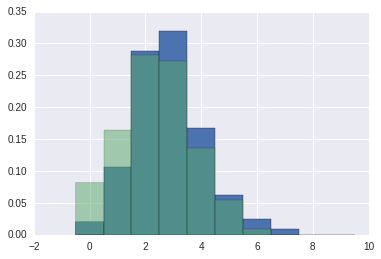

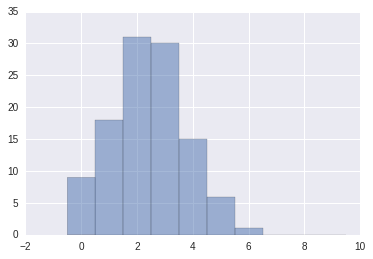

In [35]:
sig_dat = bin_dat.loc[bin_dat['bin_dat_sigfil_any']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> slight enrichment when considering all pairs significant in at least one timepoint

2.13432835821
2.0


(array([  9.,  13.,  21.,  13.,   7.,   3.,   1.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

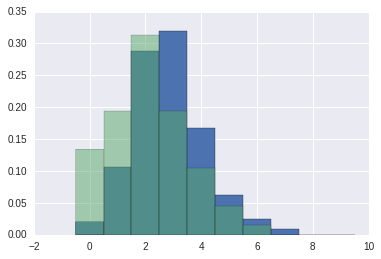

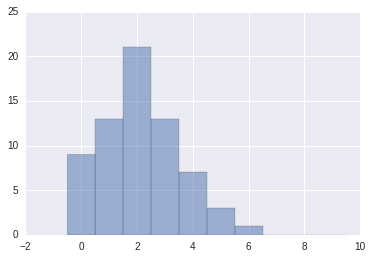

In [36]:
sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 0) & bin_dat['bin_dat_sigfil'] & (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()

plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
sig_dat_0 = sig_dat.copy()
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> stronger enrichment when considering  only significant pairs at steady state

2.71428571429
3.0


(array([ 0.,  3.,  6.,  8.,  2.,  2.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

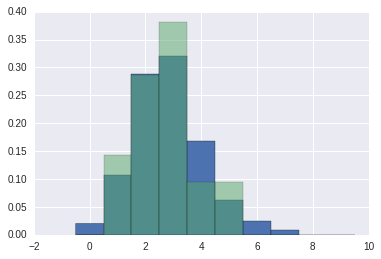

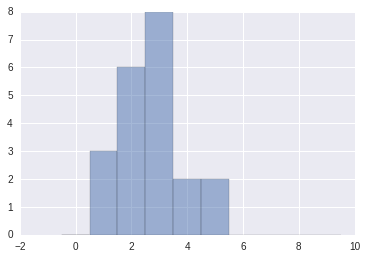

In [37]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 5) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> weaker enrichement when considering only after 5 min

2.84615384615
3.0


(array([  0.,   4.,   5.,  10.,   5.,   2.,   0.,   0.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

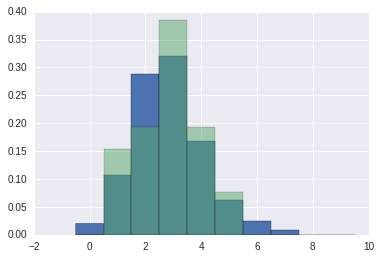

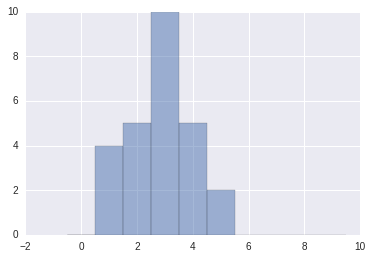

In [38]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 15) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()

plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)

print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> even weaker after only 15

2.76923076923
3.0


(array([ 0.,  2.,  1.,  8.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

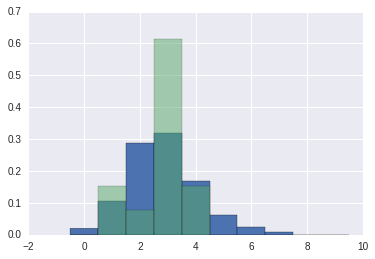

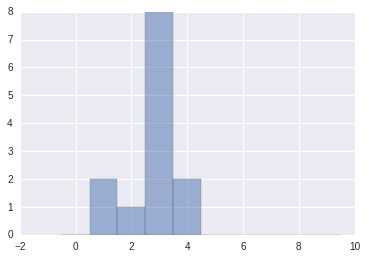

In [39]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 30) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> even less direct after 30

3.3
3.0


(array([ 0.,  1.,  0.,  5.,  3.,  1.,  0.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

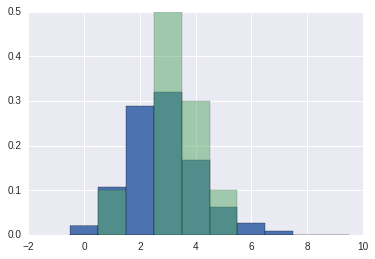

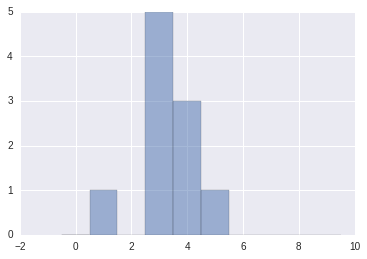

In [40]:

sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 60) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']

plt.figure()
plt.hist(pair_dat, bins=bins,normed=True)


sig_dat_0['temp'] = 1
sig_dat = pd.merge(sig_dat, sig_dat_0, how='outer')
sig_dat = sig_dat[sig_dat['temp'] != 1]

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sp_dist_hits = sig_dat.loc[fil].apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
plt.hist(sp_dist_hits, bins=bins,normed=True, alpha=0.5)
print(sp_dist_hits.mean())
print(sp_dist_hits.median())
plt.figure()
plt.hist(sp_dist_hits, bins=bins, alpha=0.5)

-> enriched for distant after 60 min

In [41]:
fil2 = (bin_dat.index.get_level_values('timepoint') == 0) & (bin_dat['bin_dat_sigfil'] == False)

sig_dat = bin_dat.loc[fil2 & (bin_dat.index.get_level_values('timepoint') == 5) & bin_dat['bin_dat_sigfil']].reset_index(drop=False)
sig_dat.columns

MultiIndex(levels=[[u'counts', u'fit_var', u'median', u'overall_var', u'var_ratio', u'stats', u'bin_dat_sigfil', u'bin_dat_sigfil_any', u'bin_dat_sigfil_any_rep', u'target', u'origin', u'timepoint', u'row_col', u'perturbation', u'marker', u'experiment'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, u'mean_var_ratio', u'mean_mean_var_ratio', u'median_mean_var_ratio', u'nr_rep', u'corr_pearson_overall', u'corr_spearman_overall', u'median_corr_pearson_overall', u'median_corr_spearman_overall', u'median_abs_corr_pearson_overall', u'median_abs_corr_spearman_overall', u'corr_pearson_bin', u'corr_spearman_bin', u'', u'is_median_varratio']],
           labels=[[15, 14, 13, 12, 11, 10, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 5], [22, 22, 22, 22, 22, 22, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2

In [42]:
fil2& fil

experiment  marker   perturbation  row_col  timepoint  origin  target                       
20150406    AKT1     EGF           D10      60         GFP     Beta-catenin                     False
                                                               E-cadherin                       False
                                                               beads                            False
                                                               cleaved PARP-cleaved caspase3    False
                                                               cyclin B1                        False
                                                               p-4EBP1                          False
                                                               p-AKT                            False
                                                               p-AMPKalpha                      False
                                                               p-BTK                       

### Look at the hists at different distances

Add the distance to the bindat

(array([ 0.08181818,  0.16363636,  0.28181818,  0.27272727,  0.13636364,
         0.05454545,  0.00909091,  0.        ,  0.        ,  0.        ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

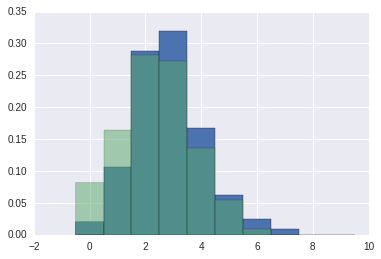

In [43]:
sig_dat = bin_dat.loc[bin_dat['bin_dat_sigfil_any']].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target']].drop_duplicates(['marker', 'target'])
sig_dat.columns = ['marker', 'target']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values('dist', ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)

,marker,target,timepoint,dist
187,RPS6KA1,p-BTK,0,6
198,RPS6KA1,E-cadherin,15,5
618,PTPN11,p-S6,0,5
142,PDPK1,p-BTK,0,5
552,MAP3K5,p-PDPK1,0,5
99,MAP2K6,p-MARCKS,5,5
39,GSK3B,p-BTK,5,5
225,SRC,p-BTK,0,4
628,RPS6KB1,p-ERK1-2,15,4
206,RPS6KA1,p-SHP2,15,4


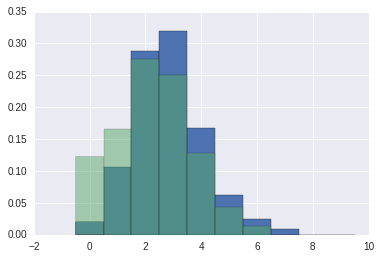

In [44]:
sig_dat = bin_dat.loc[ (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target','timepoint']].drop_duplicates(['marker', 'target','timepoint'])
sig_dat.columns = ['marker', 'target','timepoint']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat.max()))+1)-0.5
plt.hist(pair_dat, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)

sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=True)
sig_dat = sig_dat.drop_duplicates(['marker', 'target'])
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
HTML(sig_dat.to_html())


Use the in 'measured nodes in between' distance


,marker,target,timepoint,dist
618,PTPN11,p-S6,0,5
552,MAP3K5,p-PDPK1,0,4
187,RPS6KA1,p-BTK,0,3
605,PIK3CA,p-MKK3-6,0,3
150,PDPK1,p-STAT5,0,3
149,PDPK1,p-SHP2,0,3
146,PDPK1,p-MKK3-6,0,3
144,PDPK1,p-MAPKAPK2,0,3
590,MAP8,p-STAT1,0,3
589,MAP8,p-MAPKAPK2,0,3


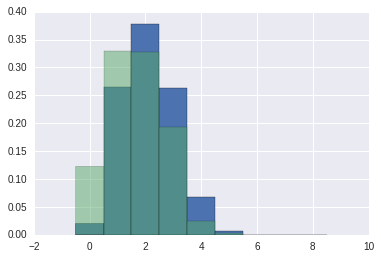

In [45]:
sig_dat = bin_dat.loc[ (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat[['marker', 'target','timepoint']].drop_duplicates(['marker', 'target','timepoint'])
sig_dat.columns = ['marker', 'target','timepoint']
plt.figure()
bins = np.arange(int(np.ceil(pair_dat_nbetween.max()))+1)-0.5
plt.hist(pair_dat_nbetween, bins=bins,normed=True)

fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))

sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = sig_dat.apply(lambda x: pair_dat_nbetween.loc[x['marker'], x['target']],axis=1)
sig_dat = sig_dat.sort_values(['dist','marker','target','timepoint'], ascending=False)
plt.hist(sig_dat['dist'], bins=bins,normed=True, alpha=0.5)
sig_dat.loc[sig_dat['timepoint'] == 0]


In [46]:
sig_dat = bin_dat.loc[(bin_dat.index.get_level_values('timepoint') == 0) & bin_dat['bin_dat_sigfil'] & (bin_dat['bin_dat_sigfil'])].reset_index(drop=False)
sig_dat =sig_dat.drop_duplicates(['marker', 'target'])
sig_dat =sig_dat[['marker', 'target','stats']]
sig_dat = sig_dat.drop_duplicates(['marker', 'target'])
fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = [pair_dat.loc[m,t] for m, t in zip(sig_dat['marker'], sig_dat['target'])]

In [47]:
sig_dat = sig_dat.sort_values('dist', ascending=False)
sig_dat.head(50)


marker       target          stats                      \
bin                       mean_var_ratio mean_mean_var_ratio   
34   RPS6KA1        p-BTK       0.315616            0.300311   
24     PDPK1        p-BTK       0.229966            0.157784   
111   PTPN11         p-S6       0.111253            0.078277   
99    MAP3K5      p-PDPK1       0.240279            0.160567   
38       SRC        p-BTK       0.552237            0.429856   
8      GSK3B       p-SHP2       0.132619            0.186044   
106     MAP8      p-STAT1       0.184516            0.134227   
105     MAP8   p-MAPKAPK2       0.198317            0.148633   
31     PDPK1       p-SHP2       0.197193            0.230670   
94    MAP3K5  p-AMPKalpha       0.332298            0.229415   
35   RPS6KA1      p-PDPK1       0.205963            0.198352   
28     PDPK1     p-MKK3-6       0.356394            0.387629   
42       SRC       p-SHP2       0.326601            0.244653   
86      HRAS        p-JNK       0.139110            0.140600   
87      HRAS    p-SMAD2-3       0.146353            0.100626   
19    MAP2K6      p-STAT5       0.105276            0.123801   
25     PDPK1        p-FAK       0.218151            0.226295   
41       SRC      p-PLCg2       0.535450            0.449002   
100   MAP3K5    p-SMAD1-5       0.161172            0.122146   
26     PDPK1   p-MAPKAPK2       0.202156            0.173323   
32     PDPK1      p-STAT5       0.191210            0.210860   
108   PIK3CA     p-MKK3-6       0.163838            0.137148   
109   PIK3CA    p-SMAD1-5       0.110176            0.091571   
112   PTPN11    p-SMAD1-5       0.117378            0.100313   
39       SRC     p-ERK1-2       0.397847            0.352432   
95    MAP3K5  p-GSK3-Beta       0.182046            0.131995   
45       SRC        p-p38       0.339381            0.273827   
96    MAP3K5        p-JNK       0.282534            0.278590   
97    MAP3K5   p-MAPKAPK2       0.265480            0.194200   
101   MAP3K5    p-SMAD2-3       0.161380            0.121722   
102   MAP3K5      p-STAT1       0.196949            0.146537   
107   PIK3CA        p-JNK       0.134235            0.106644   
110   PIK3CA        p-p38       0.140691            0.116666   
36   RPS6KA1     p-p70S6K       0.574913            0.609955   
0       AKT1      p-4EBP1       0.138566            0.120562   
16    MAP2K1      p-STAT5       0.099056            0.155855   
30     PDPK1         p-S6       0.067834            0.160176   
3       AKT1     p-MKK3-6       0.250112            0.231342   
5       AKT1     p-p70S6K       0.103353            0.138569   
7      GSK3B       p-MKK3       0.445613            0.541483   
9      GSK3B      p-STAT1       0.444711            0.528702   
10     GSK3B     p-p70S6K       0.164617            0.173858   
11    MAP2K1      p-4EBP1       0.109297            0.118756   
18    MAP2K6      p-STAT1       0.135887            0.115212   
15    MAP2K1    p-SMAD2-3       0.074702            0.110061   
98    MAP3K5     p-MKK3-6       0.563452            0.503213   
2       AKT1  p-GSK3-Beta       0.159553            0.122709   
4       AKT1    p-SMAD2-3       0.117003            0.107032   
103   MAP3K5        p-p38       0.317574            0.281742   
12    MAP2K1  p-GSK3-Beta       0.102032            0.121141   

                                                                             \
bin median_mean_var_ratio nr_rep corr_pearson_overall corr_spearman_overall   
34               0.315616      3             0.584967              0.580810   
24               0.214085      3             0.458794              0.455568   
111              0.111253      3            -0.321279             -0.296527   
99               0.147494      3             0.573019              0.598470   
38               0.394982      3             0.790263              0.654502   
8                0.169928      3             0.350521              0.297090   
106              0.140319      3             

## investigate how many of the 'close' relationships where recovered

In [48]:
sig_dat = bin_dat.reset_index(drop=False)
#sig_dat =sig_dat.drop_duplicates(['marker', 'target'])
fil = (sig_dat['marker'].apply(lambda x: x in overexp_dict.keys())) & (
    sig_dat['target'].apply(lambda x: x in antibody_dict.keys()))


sig_dat = sig_dat.loc[fil]
sig_dat['dist'] = [pair_dat.loc[m,t] for m, t in zip(sig_dat['marker'], sig_dat['target'])]

In [49]:
fil = (sig_dat['dist'] <2)& (sig_dat['timepoint'] == 5)
#
sig_dat.loc[fil]['bin_dat_sigfil_any'].mean()


fil = sig_dat['timepoint'] == 0
[sig_dat.loc[fil & (sig_dat['dist'] == i)]['bin_dat_sigfil'].mean() for i in range(10)]

[0.75,
 0.21666666666666667,
 0.13043478260869565,
 0.071428571428571425,
 0.070707070707070704,
 0.081081081081081086,
 0.066666666666666666,
 0.0,
 nan,
 nan]

In [50]:
fil = sig_dat['timepoint'] == 0
sig_dat.loc[fil & (sig_dat['dist'] == 0) & (sig_dat['bin_dat_sigfil'] == False)]
#sig_dat.loc[fil & (sig_dat['dist'] == 0) & (sig_dat['bin_dat_sigfil'] == True)]

experiment   marker perturbation row_col timepoint origin    target  \
bin                                                                         
5660    20150430   PTPN11          EGF      D3         0    GFP    p-SHP2   
5834    20150430     RPS6          EGF      E3         0    GFP      p-S6   
6018    20150430  RPS6KB1          EGF      F2         0    GFP  p-p70S6K   
9860    20150514   PTPN11          EGF      D3         0    GFP    p-SHP2   
10034   20150514     RPS6          EGF      E3         0    GFP      p-S6   
10218   20150514  RPS6KB1          EGF      F2         0    GFP  p-p70S6K   
11960   20150605   PTPN11          EGF      D3         0    GFP    p-SHP2   
12134   20150605     RPS6          EGF      E3         0    GFP      p-S6   
12318   20150605  RPS6KB1          EGF      F2         0    GFP  p-p70S6K   

      counts             ...                         stats  \
bin        0     1     2 ...  median_corr_spearman_overall   
5660    1679  2081  1633 ...                      0.105592   
5834    1228  1843  1960 ...                     -0.096190   
6018    1570  2031  1579 ...                      0.190465   
9860    1119  1088   867 ...                      0.105592   
10034   3480  2221  1538 ...                     -0.096190   
10218   1406  1904  2742 ...                      0.190465   
11960   6084  1596   390 ...                      0.105592   
12134   9825  2187   680 ...                     -0.096190   
12318   5894  3168   995 ...                      0.190465   

                                                                        \
bin   median_abs_corr_pearson_overall median_abs_corr_spearman_overall   
5660                         0.077318                         0.105592   
5834                         0.101773                         0.096190   
6018                         0.167304                         0.190465   
9860                         0.077318                         0.105592   
10034                        0.101773                         0.096190   
10218                        0.167304                         0.190465   
11960                        0.077318                         0.105592   
12134                        0.101773                         0.096190   
12318                        0.167304                         0.190465   

                                         bin_dat_sigfil bin_dat_sigfil_any  \
bin   corr_pearson_bin corr_spearman_bin                                     
5660          0.454384          0.393939          False              False   
5834         -0.791173         -0.806061          False              False   
6018          0.872414          0.987879          False              False   
9860          0.450606          0.430303          False              False   
10034        -0.651334         -0.696970          False              False   
10218         0.822452          0.709091          False              False   
11960         0.258333          0.163636          False              False   
12134        -0.142131         -0.127273          False              False   
12318         0.632788          0.587879          False              False   

      bin_dat_sigfil_any_rep              stats dist  
bin                          is_median_varratio       
5660                   False               True    0  
5834                   False              False    0  
6018                   False              False    0  
9860                   False              False    0  
10034                  False               True    0  
10218                  False               True    0  
11960                  False              False    0  
12134                  False              False    0  
12318                  False              False    0  

[9 rows x 74 columns]

In [51]:
fil = (sig_dat['bin_dat_sigfil_any'])
#

print((sig_dat.loc[fil]['dist'] >1).mean())
print((sig_dat.loc[fil]['dist'] <2).mean())
print((sig_dat.loc[fil]['dist'] >5).mean())



0.754545454545
0.245454545455
0.00909090909091


In [12]:
np.round(2**np.linspace(2,7,10))

array([   4.,    6.,    9.,   13.,   19.,   27.,   40.,   59.,   87.,  128.])